# Practical Lab3
## Hamir Ranavaya 
## 8802243

In [20]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [21]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [22]:
diabetes_X.shape


(442, 10)

In [23]:
diabetes = pd.DataFrame(diabetes_X,columns = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])
diabetes["disease_progression"] = pd.DataFrame(diabetes_y)
diabetes


age       sex       bmi        bp        s1        s2        s3   
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  disease_progression  
0   -0.002592  0.019907 -0.017646                151.0  
1   -0.039493 -0.068332 -0.092204                 75.0  
2   -0.002592  0.002861 -0.025930                141.0  
3    0.034309  0.022688 -0.009362                206.0  
4   -0.002592 -0.031988 -0.046641                135.0  
..        ...       ...       ...                  ...  
437 -0.002592  0.031193  0.007207                178.0  
438  0.034309 -0.018114  0.044485                104.0  
439 -0.011080 -0.046883  0.015491                132.0  
440  0.026560  0.044529 -0.025930                220.0  
441 -0.039493 -0.004222  0.003064                 57.0  

[442 rows x 11 columns]

In [24]:
diabetes.describe()

age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

       disease_progression  
count           442.000000  
mean            152.133484  
std              77.093005  
min              25.000000  
25%              87.000000  
50%             140.500000  
75%             211.500000  
max             346.000000

<Axes: xlabel='bmi', ylabel='disease_progression'>

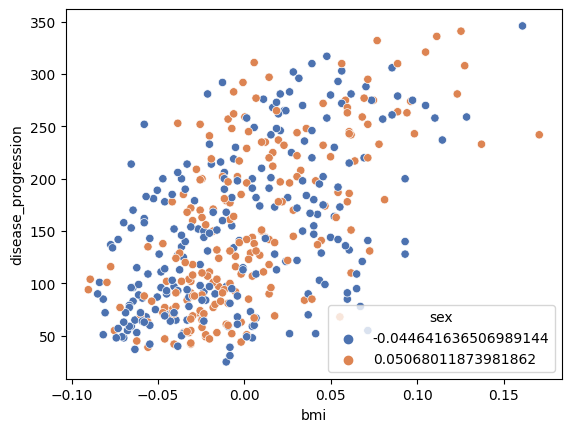

In [25]:
sns.scatterplot(data = diabetes, x = "bmi", y = "disease_progression", hue = "sex", palette= "deep")

In [26]:
X = np.array(diabetes["bmi"]).reshape(-1,1)  
y = np.array(diabetes["disease_progression"])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

Text(0, 0.5, 'Disease Progression')

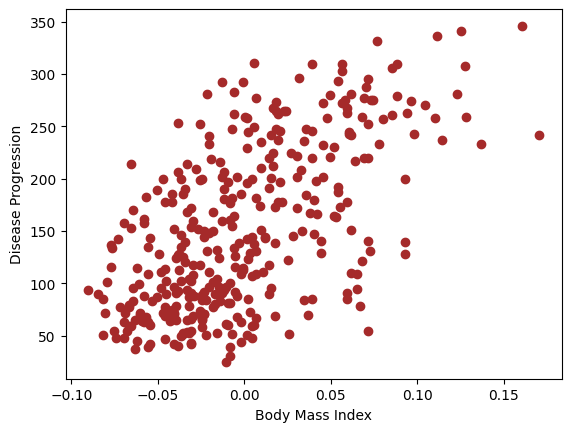

In [28]:
plt.scatter(X_train,y_train,color = 'brown',label = "Training_data")
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')

Text(0, 0.5, 'Disease Progression')

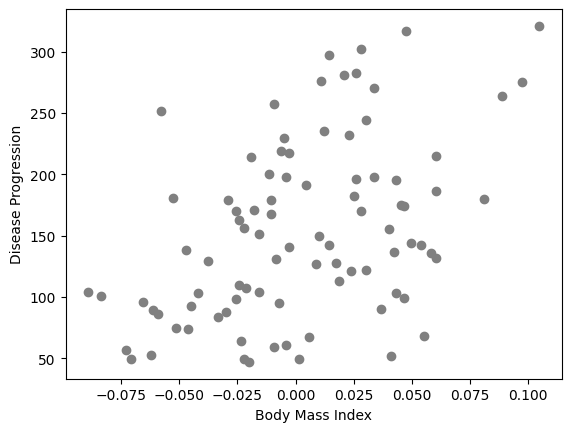

In [29]:
plt.scatter(X_test,y_test,color = "grey",label = "Test data")
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')


In [30]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
m = float(model.coef_)
c = model.intercept_
print("The slope of the model is m =",m)
print("The intercept of the mode is c=",c)

The slope of the model is m = 981.6554361411928
The intercept of the mode is c= 152.28824927379569


In [32]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
train_loss = np.mean((y_train - y_train_pred)**2)
test_loss = np.mean((y_test - y_test_pred)**2)
print("The loss on the train dataset is", train_loss)
print("The loss on the test dataset is", test_loss)

The loss on the train dataset is 3827.8186984113813
The loss on the test dataset is 4150.6801893299835


In [33]:
m = model.coef_
b = model.intercept_
print("Regression coefficients of the model are: ", m)
print("Regression Intercept is: ", b)

Regression coefficients of the model are:  [981.65543614]
Regression Intercept is:  152.28824927379569


In [34]:
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print("Train Loss: {:.2f}".format(train_loss))
print("Test Loss: {:.2f}".format(test_loss))

Train Loss: 3827.82
Test Loss: 4150.68


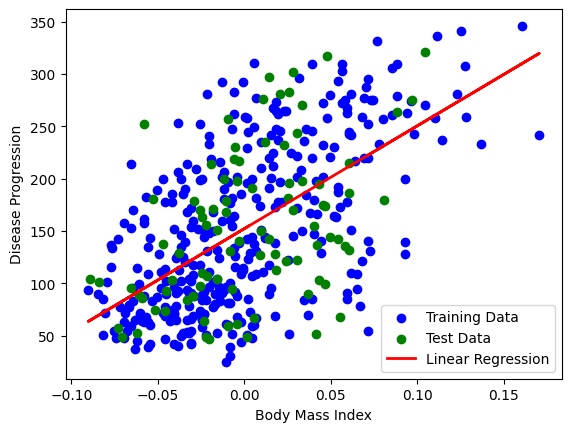

In [35]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

In [36]:
# The mean absolute error
print("Mean absolue error: %.2f" %metrics.mean_absolute_error(y_test, y_test_pred))

# Root Mean Square Error
print("RMSE of the model is: %.2f" %np.sqrt(test_loss))

# Accuracy of the model
print("R-Squared of the model: %.2f" %model.score(X,y))

Mean absolue error: 52.94
RMSE of the model is: 64.43
R-Squared of the model: 0.34


According to my knowledge, linear regression is used to establish relationship between any independent and one or more independent variables.Where as univariant regression is usually a kind of linear regression where there is only one independent variable.
In my case, "bmi" is a single predictor variable and "disease progression" is a dependent variable. This model predicts the data of disease progression only on the basis on "bmi" variable.
Hence focusing on the "bmi" and "disease progression", it is trained  and it can be evaluated using various different matrics to generate predective proficiency.